In [215]:
import os
import json
import numpy as np
import location_finding
import hyperbolic_temporal_discount
import death_process
import irt
import survival_analysis
import peregrines
import dugongs
import lotka_volterra
import moral_machines
import emotion
import rat_tumor

In [216]:
results_dir = "./results"
exp = "oed"
env = "irt"
goal = "direct"
model = "gpt-4o"
box = False
seeds = [1,2,3,4,5] 

In [217]:
nametoenv = {    
    "location_finding": location_finding.Signal,
    "hyperbolic_temporal_discount": hyperbolic_temporal_discount.TemporalDiscount,
    "death_process": death_process.DeathProcess,
    "irt": irt.IRT,
    "survival": survival_analysis.SurvivalAnalysis,
    "dugongs": dugongs.Dugongs,
    "peregrines": peregrines.Peregrines,
    "morals": moral_machines.MoralMachine,
    "emotion": emotion.EmotionFromOutcome,
    "lotka_volterra": lotka_volterra.LotkaVolterra,
    "rat_tumor": rat_tumor.RatTumorModel
}
nameenvtogoal = {
    ("hyperbolic_temporal_discount", "direct"): hyperbolic_temporal_discount.DirectGoal,
    ("hyperbolic_temporal_discount", "discount"): hyperbolic_temporal_discount.DiscountGoal,
    ("hyperbolic_temporal_discount", "direct_discovery"): hyperbolic_temporal_discount.DirectGoalNaive,
    ("location_finding", "direct"): location_finding.DirectGoal,
    ("location_finding", "source"): location_finding.SourceGoal,
    ("location_finding", "direct_discovery"): location_finding.DirectGoalNaive,
    ("death_process", "direct"): death_process.DirectDeath,
    ("death_process", "direct_discovery"): death_process.DirectDeathNaive,
    ("death_process", "infection"): death_process.InfectionRate,
    ("irt", "direct"): irt.DirectCorrectness,
    ("irt", "direct_discovery"): irt.DirectCorrectnessNaive,
    ("irt", "best_student"): irt.BestStudent,
    ("irt", "difficult_question"): irt.DifficultQuestion,
    ("irt", "discriminate_question"): irt.DiscriminatingQuestion,
    ("survival", "direct"): survival_analysis.DirectGoal,
    ("survival", "direct_discovery"): survival_analysis.DirectGoalNaive,
    ("dugongs", "direct"): dugongs.DirectGoal,
    ("dugongs", "direct_discovery"): dugongs.DirectGoalNaive,
    ("peregrines", "direct"): peregrines.DirectGoal,
    ("peregrines", "direct_discovery"): peregrines.DirectGoalNaive,
    ("emotion", "direct"): emotion.DirectEmotionPrediction,
    ("emotion", "direct_discovery"): emotion.DirectEmotionNaive,
    ("morals", "direct"): moral_machines.DirectPrediction,
    ("morals", "direct_discovery"): moral_machines.DirectPredictionNaive,
    ("lotka_volterra", "direct"): lotka_volterra.DirectGoal,
    ("lotka_volterra", "direct_discovery"): lotka_volterra.DirectGoalNaive,
    ("rat_tumor", "direct"): rat_tumor.DirectGoal,
    ("rat_tumor", "direct_discovery"): rat_tumor.DirectGoalNaive
}

In [218]:
environ = nametoenv[env]()
goaln = nameenvtogoal[env, goal](environ)
try:
    norm_mu = goaln.norm_mu
    norm_sigma = goaln.norm_sigma
except:
    norm_mu = 0
    norm_sigma = 1
    
print(f"norm_mu: {norm_mu}, norm_sigma: {norm_sigma}")

norm_mu: 10991.5464, norm_sigma: 15725.115658658306


In [219]:
files = [os.path.join(results_dir, env, f"{goal}_{model}_{exp}_true_{seed}.json") for seed in seeds]
files_no_prior = [os.path.join(results_dir, env, f"{goal}_{model}_{exp}_false_{seed}.json") for seed in seeds]
regret_files = [os.path.join(results_dir, env, f"regret_{goal}_{model}_{exp}_true_{seed}.json") for seed in seeds]
regret_files_no_prior = [os.path.join(results_dir, env, f"regret_{goal}_{model}_{exp}_false_{seed}.json") for seed in seeds]
# read files for box now
files_box = [os.path.join(results_dir, env, f"{goal}_{model}-boxloop_{exp}_true_{seed}.json") for seed in seeds]
files_no_prior_box = [os.path.join(results_dir, env, f"{goal}_{model}-boxloop_{exp}_false_{seed}.json") for seed in seeds]
regret_files_box = [os.path.join(results_dir, env, f"regret_{goal}_{model}-boxloop_{exp}_true_{seed}.json") for seed in seeds]
regret_files_no_prior_box = [os.path.join(results_dir, env, f"regret_{goal}_{model}-boxloop_{exp}_false_{seed}.json") for seed in seeds]

In [220]:
data = []
for file in files:
    print(file)
    with open(file, "r") as f:
        data.append(json.load(f))
data_no_prior = []
for file in files_no_prior:
    if not os.path.exists(file):
        continue
    print(file)
    with open(file, "r") as f:
        data_no_prior.append(json.load(f))
regrets = []
for file in regret_files:
    if not os.path.exists(file):
        continue

    print(file)
    with open(file, "r") as f:
        regrets.append(json.load(f))
regrets_no_prior = []
for file in regret_files_no_prior:
    if not os.path.exists(file):
        continue
    print(file)
    with open(file, "r") as f:
        regrets_no_prior.append(json.load(f))

# read files for box now
data_box = []
for file in files_box:
    if not os.path.exists(file):
        continue
    print(file)
    with open(file, "r") as f:
        data_box.append(json.load(f))
data_no_prior_box = []
for file in files_no_prior_box:
    if not os.path.exists(file):
        continue
    print(file)
    with open(file, "r") as f:
        data_no_prior_box.append(json.load(f))
regrets_box = []
for file in regret_files_box:
    if not os.path.exists(file):
        continue

    print(file)
    with open(file, "r") as f:
        regrets_box.append(json.load(f))
regrets_no_prior_box = []
for file in regret_files_no_prior_box:
    if not os.path.exists(file):
        continue
    print(file)
    with open(file, "r") as f:
        regrets_no_prior_box.append(json.load(f))


./results/peregrines/direct_gpt-4o_oed_True_1.json
./results/peregrines/direct_gpt-4o_oed_True_2.json
./results/peregrines/direct_gpt-4o_oed_True_3.json
./results/peregrines/direct_gpt-4o_oed_True_4.json
./results/peregrines/direct_gpt-4o_oed_True_5.json
./results/peregrines/direct_gpt-4o_oed_False_1.json
./results/peregrines/direct_gpt-4o_oed_False_2.json
./results/peregrines/direct_gpt-4o_oed_False_3.json
./results/peregrines/direct_gpt-4o_oed_False_4.json
./results/peregrines/direct_gpt-4o_oed_False_5.json
./results/peregrines/regret_direct_gpt-4o_oed_True_1.json
./results/peregrines/regret_direct_gpt-4o_oed_True_2.json
./results/peregrines/regret_direct_gpt-4o_oed_True_3.json
./results/peregrines/regret_direct_gpt-4o_oed_True_4.json
./results/peregrines/regret_direct_gpt-4o_oed_True_5.json
./results/peregrines/regret_direct_gpt-4o_oed_False_1.json
./results/peregrines/regret_direct_gpt-4o_oed_False_2.json
./results/peregrines/regret_direct_gpt-4o_oed_False_3.json
./results/peregrin

In [221]:
print(len(data[0]['data']['results'][0]))
# print(data[0]['data']['results'][0][0])
# print(data[0]['data']['results'][0][1])
# print(data[0]['data']['results'][0][2])
# print(data[0]['data']['results'][0][3])
# mse = (float(data[0]['data']['results'][0][3][0]) - data[0]['data']['results'][0][2][0])**2
# print(mse)
# print(data[0]['data']['results'][0][0])
# print(data[1]['data']['results'][0][0])
# print(data[2]['data']['results'][0][0])
# print(data[3]['data']['results'][0][0])
# print(data[4]['data']['results'][0][0])


# mean = data[0]['data']['results'][0][0][0] + data[1]['data']['results'][0][0][0] + data[2]['data']['results'][0][0][0] + data[3]['data']['results'][0][0][0] + data[4]['data']['results'][0][0][0]
# mean /= 5
# print(mean)

# (mean, std), questions, gts, predictions
# print(regrets[0].keys())

4


In [222]:
observations = [d['data']['observations'] for d in data]
observations_no_prior = [d['data']['observations'] for d in data_no_prior]
box_observations = [d['data']['observations'] for d in data_box]
box_observations_no_prior = [d['data']['observations'] for d in data_no_prior_box]

successes = [d['data']['successes'] for d in data]
successes_no_prior = [d['data']['successes'] for d in data_no_prior]
box_successes = [d['data']['successes'] for d in data_box]
box_successes_no_prior = [d['data']['successes'] for d in data_no_prior_box]

errs, stds = [], []
for d in data:
    errs.append([])
    stds.append([])
    for r in d['data']['results']: 
        errs[-1].append(r[0][0])
        stds[-1].append(r[0][1])

box_errs, box_stds = [], []
for d in data_box:
    box_errs.append([])
    box_stds.append([])
    for r in d['data']['results']: 
        box_errs[-1].append(r[0][0])
        box_stds[-1].append(r[0][1])

errs_no_prior, stds_no_prior = [], []
for d in data_no_prior:
    errs_no_prior.append([])
    stds_no_prior.append([])
    for r in d['data']['results']: 
        errs_no_prior[-1].append(r[0][0])
        stds_no_prior[-1].append(r[0][1])

box_errs_no_prior, box_stds_no_prior = [], []
for d in data_no_prior_box:
    box_errs_no_prior.append([])
    box_stds_no_prior.append([])
    for r in d['data']['results']: 
        box_errs_no_prior[-1].append(r[0][0])
        box_stds_no_prior[-1].append(r[0][1])

errs = np.array(errs)
stds = np.array(stds)
box_errs = np.array(box_errs)
box_stds = np.array(box_stds)
errs_no_prior = np.array(errs_no_prior)
stds_no_prior = np.array(stds_no_prior)
box_errs_no_prior = np.array(box_errs_no_prior)
box_stds_no_prior = np.array(box_stds_no_prior)

if env == "location_finding" and "direct" in goal:
    # clip
    errs = np.clip(errs, 0, 10000)
    box_errs = np.clip(box_errs, 0, 10000)
    errs_no_prior = np.clip(errs_no_prior, 0, 10000)
    box_errs_no_prior = np.clip(box_errs_no_prior, 0, 10000)

# normalize
errs = (errs - norm_mu) / norm_sigma
box_errs = (box_errs - norm_mu) / norm_sigma
errs_no_prior = (errs_no_prior - norm_mu) / norm_sigma
box_errs_no_prior = (box_errs_no_prior - norm_mu) / norm_sigma

if env == "irt":#  and not box:
    #TODO: hacky fix for irt
    eigs, eigs_no_prior, eig_regrets, eigregrets_no_prior = [], [], [], []
    for a, d in enumerate(regrets):
        eigs.append([])
        eig_regrets.append([])
        for b, r in enumerate(d['eigs']):
            if successes[a][b]:
                eigs[-1].append(r)
                eig_regrets[-1].append(d['eigs_regret'][b])

        eigs[-1] = eigs[-1][:9]
        eig_regrets[-1] = eig_regrets[-1][:9]
        
    for a, d in enumerate(regrets_no_prior):
        eigs_no_prior.append([])
        eigregrets_no_prior.append([])
        for b, r in enumerate(d['eigs']):
            if successes_no_prior[a][b]:
                eigs_no_prior[-1].append(r)
                eigregrets_no_prior[-1].append(d['eigs_regret'][b])
        eigs_no_prior[-1] = eigs_no_prior[-1][:9]
        eigregrets_no_prior[-1] = eigregrets_no_prior[-1][:9]
if env == "irt":# and box:
    #TODO: hacky fix for irt
    box_eigs, box_eigs_no_prior, box_eig_regrets, box_eigregrets_no_prior = [], [], [], []
    for a, d in enumerate(regrets_box):
        box_eigs.append([])
        box_eig_regrets.append([])
        for b, r in enumerate(d['eigs']):
            if box_successes[a][b]:
                box_eigs[-1].append(r)
                box_eig_regrets[-1].append(d['eigs_regret'][b])

        box_eigs[-1] = box_eigs[-1][:9]
        box_eig_regrets[-1] = box_eig_regrets[-1][:9]
        
    for a, d in enumerate(regrets_no_prior_box):
        box_eigs_no_prior.append([])
        box_eigregrets_no_prior.append([])
        for b, r in enumerate(d['eigs']):
            if box_successes_no_prior[a][b]:
                box_eigs_no_prior[-1].append(r)
                box_eigregrets_no_prior[-1].append(d['eigs_regret'][b])
        box_eigs_no_prior[-1] = box_eigs_no_prior[-1][:9]
        box_eigregrets_no_prior[-1] = box_eigregrets_no_prior[-1][:9]
else:
    try:
        eigs = [np.array(d['eigs']) for d in regrets]
        eigs_no_prior = [np.array(d['eigs']) for d in regrets_no_prior]
        box_eigs = [np.array(d['eigs']) for d in regrets_box]
        box_eigs_no_prior = [np.array(d['eigs']) for d in regrets_no_prior_box]
    except:
        eigs = []
        eigs_no_prior = []
        box_eigs = []
        box_eigs_no_prior = []
    eig_regrets = [np.array(d['eigs_regret']) for d in regrets]
    eigregrets_no_prior = [np.array(d['eigs_regret']) for d in regrets_no_prior]
    box_eig_regrets = [np.array(d['eigs_regret']) for d in regrets_box]
    box_eigregrets_no_prior = [np.array(d['eigs_regret']) for d in regrets_no_prior_box]
print([len(e) for e in eigs])
print([len(e) for e in eigs_no_prior])
print([len(e) for e in eig_regrets])
print([len(e) for e in eigregrets_no_prior])
print([len(e) for e in box_eigs])
print([len(e) for e in box_eigs_no_prior])
print([len(e) for e in box_eig_regrets])
print([len(e) for e in box_eigregrets_no_prior])

if env == "hyperbolic_temporal_discount" and "direct" in goal:
    errs = 1 - errs
    errs_no_prior = 1 - errs_no_prior
    box_errs = 1 - box_errs
    box_errs_no_prior = 1 - box_errs_no_prior
# if env == "peregrines":
#     errs = errs ** 0.5
#     errs_no_prior = errs_no_prior ** 0.5 
if env == "survival":
    errs = 1 - errs
    errs_no_prior = 1 - errs_no_prior
    box_errs = 1 - box_errs
    box_errs_no_prior = 1 - box_errs_no_prior
if env == "morals":
    print("removing")
    errs = 1 - errs
    box_errs = 1 - box_errs
if env == "location_finding":
    if "source" in goal:
        # clip
        eig_regrets = np.clip(eig_regrets, 0, 50000)
        eig_regrets/=1000
        box_eig_regrets = np.clip(box_eig_regrets, 0, 50000)
        box_eig_regrets/=1000
    elif "direct" in goal:
        eig_regrets = np.clip(eig_regrets, 0, 50000)
        eig_regrets/=1000
        box_eig_regrets = np.clip(box_eig_regrets, 0, 50000)
        box_eig_regrets/=1000
        eigregrets_no_prior = np.clip(eigregrets_no_prior, 0, 50000)
        box_eigregrets_no_prior = np.clip(box_eigregrets_no_prior, 0, 50000)
        eigregrets_no_prior/=1000
        box_eigregrets_no_prior/=1000
    

mean_score = np.mean(errs, axis=0)
ci_95 = 1.96 * np.std(errs, axis=0) / np.sqrt(len(errs))
box_mean_score = np.mean(box_errs, axis=0)
box_ci_95 = 1.96 * np.std(box_errs, axis=0) / np.sqrt(len(box_errs))
mean_score_no_prior = None
ci_95_no_prior = None
if len(errs_no_prior) > 0:
    mean_score_no_prior = np.mean(errs_no_prior, axis=0)
    ci_95_no_prior = 1.96 * np.std(errs_no_prior, axis=0) / np.sqrt(len(errs_no_prior))
    box_mean_score_no_prior = np.mean(box_errs_no_prior, axis=0)
    box_ci_95_no_prior = 1.96 * np.std(box_errs_no_prior, axis=0) / np.sqrt(len(box_errs_no_prior))



print(mean_score[0])
print(ci_95[0])
print(mean_score_no_prior[0])
print(ci_95_no_prior[0])

[10, 10, 10, 10, 10]
[10, 10, 10, 10, 10]
[10, 10, 10, 10, 10]
[10, 10, 10, 10, 10]
[10, 10, 10, 10, 10]
[10, 10, 10, 10]
[10, 10, 10, 10, 10]
[10, 10, 10, 10]
2.293096876533666
1.2044046866001712
2.217954662915072
1.5684018284422452


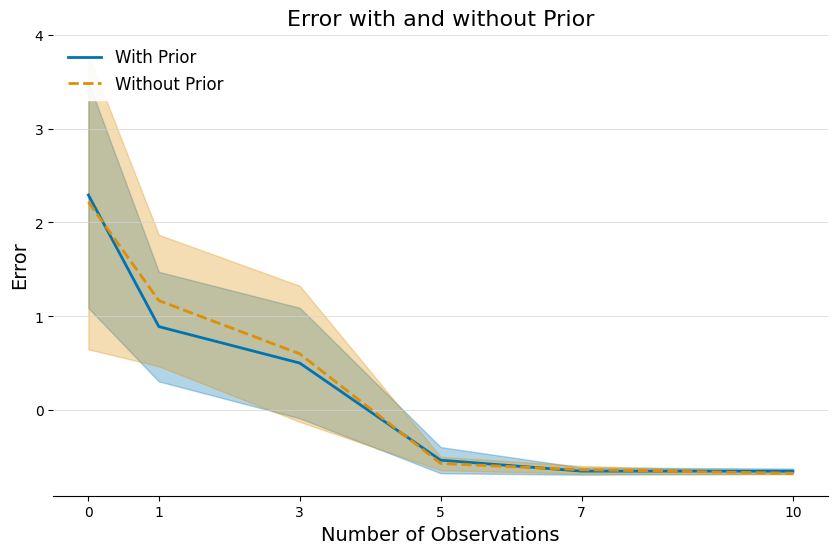

In [223]:
from plot_utils import plot_lines

exp_list = [0, 1, 3, 5, 7, 10]
box_exp_list = [0, 5, 10]

save_path = os.path.join('./plots', f"both_{env}_{goal}_{model}_{exp}_oed_error.png")
# plot_lines2(exp_list, mean_score, ci_95, mean_score_no_prior, ci_95_no_prior, 
#         "w/ Prior gpt-4o", "w/o Prior gpt-4o", 
#         box_exp_list, box_mean_score, box_ci_95, box_mean_score_no_prior, box_ci_95_no_prior, 
#         "w/ Prior Box's Apprentice", "w/o Prior Box's Apprentice", 
#         "", "", "", save_path, legend_loc="upper right")

# print(len(mean_score), len(mean_score_no_prior))
# print(len(exp_list))
plot_lines(exp_list, mean_score, ci_95, mean_score_no_prior, ci_95_no_prior, "With Prior", "Without Prior", "Number of Observations", "Error", "Error with and without Prior", save_path)
# print(mean_score)


In [224]:
# print len of queries in data
print(len(data[0]['data']['queries']))

10


In [225]:
print(np.array(eigs).shape)
print(np.array(eigs_no_prior).shape)
print(np.array(eig_regrets).shape)
print(np.array(eigregrets_no_prior).shape)

(5, 10)
(5, 10)
(5, 10)
(5, 10)


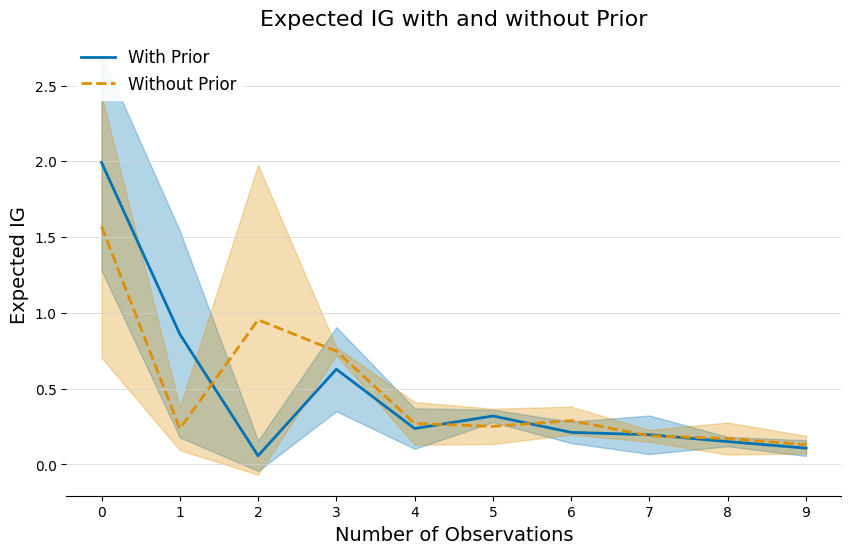

In [226]:
if env == "irt":
    #TODO: hacky fix for irt
    observation_nums = list(range(9))
else:
    observation_nums = list(range(10))
eigs = np.array(eigs)
eigs_no_prior = np.array(eigs_no_prior)

# clip eigs at 100, -100
# eigs = np.clip(eigs, -100, 100)
# eigs_no_prior = np.clip(eigs_no_prior, -100, 100)
if len(eigs) > 0:
    mean_eigs = np.mean(eigs, axis=0)
    ci_95_eigs = 1.96 * np.std(eigs, axis=0) / np.sqrt(len(eigs))
    if len(eigs_no_prior) > 0:
        mean_eigs_no_prior = np.mean(eigs_no_prior, axis=0)
        ci_95_eigs_no_prior = 1.96 * np.std(eigs_no_prior, axis=0) / np.sqrt(len(eigs_no_prior))
    else:
        mean_eigs_no_prior = None
        ci_95_eigs_no_prior = None
    save_path = os.path.join('./plots', f"{env}_{goal}_{model}_{exp}_oed_eigs.png")
    plot_lines(observation_nums, mean_eigs, ci_95_eigs, mean_eigs_no_prior, ci_95_eigs_no_prior, "With Prior", "Without Prior", "Number of Observations", "Expected IG", "Expected IG with and without Prior", save_path)

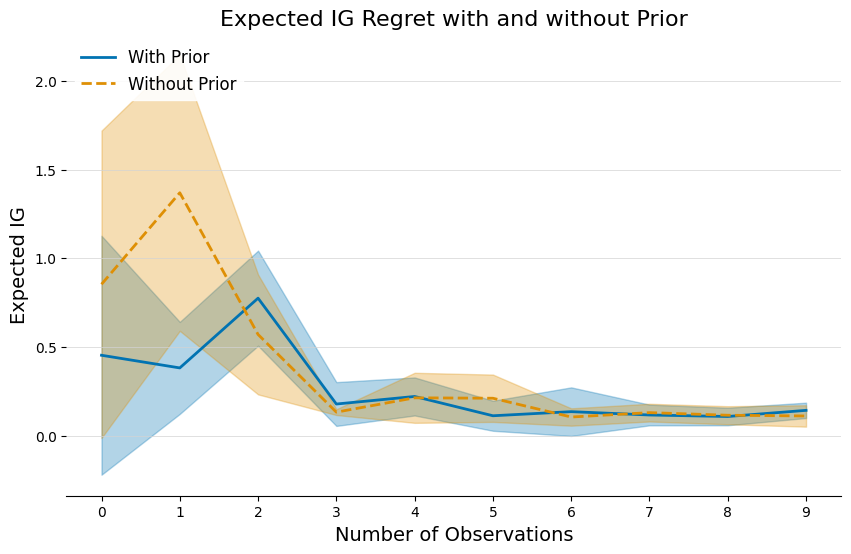

In [227]:
# regret_prior = [regret['eigs_regret'] for regret in regrets]
# regret_no_prior = [regret['eigs_regret'] for regret in regrets_no_prior]
regret_prior = eig_regrets
regret_no_prior = eigregrets_no_prior
box_regret_prior = box_eig_regrets
box_regret_no_prior = box_eigregrets_no_prior
if env == "irt":
    #TODO: hacky fix for irt
    observation_nums = list(range(9))
else:
    observation_nums = list(range(10))

mean_regret = None
box_mean_regret = None
if len(regret_prior) > 0:
    mean_regret = np.mean(regret_prior, axis=0)
    box_mean_regret = np.mean(box_regret_prior, axis=0)
    ci_95_regret = 1.96 * np.std(regret_prior, axis=0) / np.sqrt(len(regret_prior))
    box_ci_95_regret = 1.96 * np.std(box_regret_prior, axis=0) / np.sqrt(len(box_regret_prior))
    mean_regret_no_prior = None
    box_mean_regret_no_prior = None
    if len(regret_no_prior) > 0:
        mean_regret_no_prior = np.mean(regret_no_prior, axis=0)
        ci_95_regret_no_prior = 1.96 * np.std(regret_no_prior, axis=0) / np.sqrt(len(regret_no_prior))
        box_mean_regret_no_prior = np.mean(box_regret_no_prior, axis=0)
        box_ci_95_regret_no_prior = 1.96 * np.std(box_regret_no_prior, axis=0) / np.sqrt(len(box_regret_no_prior))
    else:
        mean_regret_no_prior = None
        ci_95_regret_no_prior = None
        box_mean_regret_no_prior = None
        box_ci_95_regret_no_prior = None

    save_path = os.path.join('./plots', f"both_{env}_{goal}_{model}_{exp}_oed_regret.png")
    plot_lines(observation_nums, mean_regret, ci_95_regret, mean_regret_no_prior, ci_95_regret_no_prior, "With Prior", "Without Prior", "Number of Observations", "Expected IG", "Expected IG Regret with and without Prior", save_path)

    # plot_lines2(observation_nums, mean_regret, ci_95_regret, mean_regret_no_prior, ci_95_regret_no_prior, 
    #         "w/ Prior gpt-4o", "w/o Prior gpt-4o", 
    #         observation_nums, box_mean_regret, box_ci_95_regret, box_mean_regret_no_prior, box_ci_95_regret_no_prior,
    #         "w/ Prior Box's Apprentice", "w/o Prior Box's Apprentice", 
    #         "", "", "", save_path, legend_loc="lower left")

In [228]:
print(mean_score[-1])

-0.6478671840095858


In [229]:
# Metrics to report in the table:

print(f"{'Metric':<40} &  \\\\")
# 3. Mean error at 0 observations
mean_error_0 = mean_score[0]
ci_95_error_0 = ci_95[0]
print(f"{'Mean Error at 0 Observations':<40} & {mean_error_0} ({ci_95_error_0})")
# 4. Mean error at 0 observations without prior
if mean_score_no_prior is not None:
    mean_error_0_no_prior = mean_score_no_prior[0]
    ci_95_error_0_no_prior = ci_95_no_prior[0]
    print(f"{'No Prior Mean Error at 0 Observations':<40} & {mean_error_0_no_prior} ({ci_95_error_0_no_prior}) \\\\")
# 1. Mean error at 10 observations
mean_error_10 = mean_score[-1]
ci_95_error_10 = ci_95[-1]
print(f"{'Prior Mean Error at 10 Observations':<40} & {mean_error_10} ({ci_95_error_10})") 
# 2. Mean error at 10 observations without prior
if mean_score_no_prior is not None:
    mean_error_10_no_prior = mean_score_no_prior[-1]
    ci_95_error_10_no_prior = ci_95_no_prior[-1]
    print(f"{'No Prior Mean Error at 10 Observations':<40} & {mean_error_10_no_prior} ({ci_95_error_10_no_prior}) \\\\")

# 5. Mean regret over all observations
if mean_regret is not None:
    mean_regret_all = np.mean(mean_regret)
    ci_95_regret_all = np.mean(ci_95_regret)
    print(f"{'Mean Regret over all Observations':<40} & {mean_regret_all} ({ci_95_regret_all})")
# 6. Mean regret over all observations without prior
if mean_regret_no_prior is not None:
    mean_regret_all_no_prior = np.mean(mean_regret_no_prior)
    ci_95_regret_all_no_prior = np.mean(ci_95_regret_no_prior)
    print(f"{'No Prior Mean Regret over all Observations':<40} & {mean_regret_all_no_prior} ({ci_95_regret_all_no_prior}) \\\\")

# Print the table




Metric                                   &  \\
Mean Error at 0 Observations             & 2.293096876533666 (1.2044046866001712)
No Prior Mean Error at 0 Observations    & 2.217954662915072 (1.5684018284422452) \\
Prior Mean Error at 10 Observations      & -0.6478671840095858 (0.027406741474655518)
No Prior Mean Error at 10 Observations   & -0.6699426973180597 (0.013939838687295897) \\
Mean Regret over all Observations        & 0.2620130507233453 (0.1805233535683571)
No Prior Mean Regret over all Observations & 0.3807729669357411 (0.24847595751516813) \\


In [145]:
print(np.mean(box_mean_regret_no_prior))

0.07551639363717264


In [231]:
# Metrics to report in the table:

print(f"{'Metric':<40} &  \\\\")
# 3. Mean error at 0 observations
mean_error_0 = box_mean_score[0]
ci_95_error_0 = box_ci_95[0]
print(f"{'Mean Error at 0 Observations':<40} & {mean_error_0} ({ci_95_error_0})")
# 4. Mean error at 0 observations without prior
if box_mean_score_no_prior is not None:
    mean_error_0_no_prior = box_mean_score_no_prior[0]
    ci_95_error_0_no_prior = box_ci_95_no_prior[0]
    print(f"{'No Prior Mean Error at 0 Observations':<40} & {mean_error_0_no_prior} ({ci_95_error_0_no_prior}) \\\\")
# 1. Mean error at 10 observations
mean_error_10 = box_mean_score[-1]
ci_95_error_10 = box_ci_95[-1]
print(f"{'Prior Mean Error at 10 Observations':<40} & {mean_error_10} ({ci_95_error_10})") 
# 2. Mean error at 10 observations without prior
if box_mean_score_no_prior is not None:
    mean_error_10_no_prior = box_mean_score_no_prior[-1]
    ci_95_error_10_no_prior = box_ci_95_no_prior[-1]
    print(f"{'No Prior Mean Error at 10 Observations':<40} & {mean_error_10_no_prior} ({ci_95_error_10_no_prior}) \\\\")

# # 5. Mean regret over all observations
# if mean_regret is not None:
#     mean_regret_all = np.mean(mean_regret)
#     ci_95_regret_all = np.mean(ci_95_regret)
#     print(f"{'Mean Regret over all Observations':<40} & {mean_regret_all} ({ci_95_regret_all})")
# # 6. Mean regret over all observations without prior
# if mean_regret_no_prior is not None:
#     mean_regret_all_no_prior = np.mean(mean_regret_no_prior)
#     ci_95_regret_all_no_prior = np.mean(ci_95_regret_no_prior)
#     print(f"{'No Prior Mean Regret over all Observations':<40} & {mean_regret_all_no_prior} ({ci_95_regret_all_no_prior}) \\\\")

# Print the table




Metric                                   &  \\
Mean Error at 0 Observations             & 2.71184228629314 (0.603601059435372)
No Prior Mean Error at 0 Observations    & 1.6226038748370666 (0.466558671160722) \\
Prior Mean Error at 10 Observations      & 0.03922855725772344 (0.20761382127810557)
No Prior Mean Error at 10 Observations   & 0.9485446036631988 (0.8563547708697316) \\
